In [333]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [335]:
os.chdir('/content/gdrive/MyDrive/CourseDA')

In [336]:
os.listdir()

['healthcare-dataset-stroke-data.csv',
 'diabetes_prediction_dataset_.csv',
 'diabetes_prediction_dataset.csv',
 'movies_metadata.csv',
 'ratings_small.csv',
 'AIDS_Classification_50000.csv',
 'heart-dt.csv']

In [337]:
movies_data=pd.read_csv("movies_metadata.csv")

In [338]:
movies_data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [339]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [340]:
movies_data["release_date"]=pd.to_datetime(movies_data["release_date"])

In [341]:
movies_data["release_date"]

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45458          NaT
45459   2011-11-17
45460   2003-08-01
45461   1917-10-21
45462   2017-06-09
Name: release_date, Length: 45463, dtype: datetime64[ns]

In [342]:
movies_data=movies_data.set_index("original_title")

In [343]:
movies_data=movies_data.reset_index("original_title")

In [344]:
movies_release=movies_data[(movies_data["status"]=="Released")].sort_values(["budget", "popularity", "revenue", "runtime", "vote_average"], ascending=[False, False, False, False, False])

In [345]:
movies_release

,original_title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
17124,Pirates of the Caribbean: On Stranger Tides,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Captain Jack Sparrow crosses paths with a woma...,...,2011-05-14,1.045714e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0
11827,Pirates of the Caribbean: At World's End,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,"Captain Barbossa, long believed to be dead, ha...",...,2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0
26557,Avengers: Age of Ultron,True,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,When Tony Stark tries to jumpstart a dormant p...,...,2015-04-22,1.405404e+09,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,6908.0
11067,Superman Returns,True,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman returns to discover his 5-year absenc...,...,2006-06-28,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,False,5.4,1429.0
44839,Transformers: The Last Knight,True,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,335988,tt3371366,en,"Autobots and Decepticons are at war, with huma...",...,2017-06-21,6.049421e+08,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.2,1440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18038,Pajęczarki,True,NaN,0,[],NaN,344741,tt0105087,pl,NaN,...,NaT,0.000000e+00,NaN,[],Released,NaN,Pajęczarki,False,0.0,0.0
18572,Pölynimurikauppiaat,True,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,404471,tt0107903,fi,NaN,...,NaT,0.000000e+00,NaN,[],Released,NaN,Pölynimurikauppiaat,False,0.0,0.0
37211,Normaal: Ik Kom Altied Weer Terug,True,NaN,0,[],NaN,180240,tt0304483,nl,NaN,...,NaT,0.000000e+00,NaN,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,NaN,Normaal: Ik Kom Altied Weer Terug,False,0.0,0.0
41396,Allende en su laberinto,True,NaN,0,[],NaN,419289,tt2782754,es,NaN,...,NaT,0.000000e+00,NaN,[],Released,NaN,Allende en su laberinto,False,0.0,0.0


In [346]:
movies_release.isna().sum()

original_title               0
adult                        0
belongs_to_collection    40548
budget                       0
genres                       0
homepage                 37308
id                           0
imdb_id                     15
original_language           10
overview                   920
popularity                   0
poster_path                373
production_companies         0
production_countries         0
release_date                78
revenue                      0
runtime                    251
spoken_languages             0
status                       0
tagline                  24714
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [347]:
movies_release["belongs_to_collection"]=movies_release["belongs_to_collection"].fillna("No Data")
movies_release["homepage"]=movies_release["homepage"].fillna("No Data")
movies_release["tagline"]=movies_release["tagline"].fillna("No tagline")

In [348]:
movies_release.dropna(inplace=True)

In [349]:
movies_release.isna().sum()

original_title           0
adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

In [350]:
movies_release.duplicated().sum()

16

In [351]:
movies_release.drop_duplicates(inplace=True)

In [352]:
movies_release.duplicated().sum()

0

In [353]:
os.listdir()

['healthcare-dataset-stroke-data.csv',
 'diabetes_prediction_dataset_.csv',
 'diabetes_prediction_dataset.csv',
 'movies_metadata.csv',
 'ratings_small.csv',
 'AIDS_Classification_50000.csv',
 'heart-dt.csv']

In [354]:
rating=pd.read_csv("ratings_small.csv")

In [355]:
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [356]:
rating["timestamp"]=pd.to_datetime(rating["timestamp"], unit="s")

In [357]:
rating["timestamp"]

0        2009-12-14 02:52:24
1        2009-12-14 02:52:59
2        2009-12-14 02:53:02
3        2009-12-14 02:53:05
4        2009-12-14 02:53:25
                 ...        
99999    2003-10-08 02:16:10
100000   2003-10-03 02:46:41
100001   2003-12-09 03:26:03
100002   2003-12-09 14:21:03
100003   2004-01-22 15:18:44
Name: timestamp, Length: 100004, dtype: datetime64[ns]

In [358]:
rating_movies=rating.groupby("movieId", as_index=False)["rating"].median()

In [359]:
rating_movies

,movieId,rating
0,1,4.0
1,2,3.0
2,3,3.0
3,4,3.0
4,5,3.0
...,...,...
9061,161944,5.0
9062,162376,4.5
9063,162542,5.0
9064,162672,3.0


In [360]:
movies_release=movies_release.merge(rating_movies,
                     left_on="id",
                     right_on="movieId",
                     how="inner")

In [361]:
movies_release

,original_title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,rating
0,Pirates of the Caribbean: On Stranger Tides,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Captain Jack Sparrow crosses paths with a woma...,...,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0,1865,3.50
1,Pirates of the Caribbean: At World's End,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,"Captain Barbossa, long believed to be dead, ha...",...,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0,285,4.00
2,Spider-Man 3,True,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.sonypictures.com/movies/spider-man3/,559,tt0413300,en,The seemingly invincible Spider-Man goes up ag...,...,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,5.9,3687.0,559,5.00
3,Harry Potter and the Half-Blood Prince,True,"{'id': 1241, 'name': 'Harry Potter Collection'...",250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,767,tt0417741,en,"As Harry begins his sixth year at Hogwarts, he...",...,153.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,False,7.4,5435.0,767,4.00
4,The Chronicles of Narnia: Prince Caspian,True,"{'id': 420, 'name': 'The Chronicles of Narnia ...",225000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",No Data,2454,tt0499448,en,One year after their incredible adventures in ...,...,150.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,False,6.3,1668.0,2454,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,Mahakaal,True,No Data,0,"[{'id': 27, 'name': 'Horror'}]",No Data,99106,tt0260155,hi,A demon torments the family and friends of Ani...,...,132.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,No tagline,The Monster,False,6.0,1.0,99106,2.50
2789,"Crosby, Stills & Nash: Long Time Comin'",True,No Data,0,[],No Data,40959,tt0243199,en,"This is a fine video from CSN. Lots of old, ra...",...,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No tagline,"Crosby, Stills & Nash: Long Time Comin'",False,0.0,0.0,40959,1.75
2790,Day of the Reaper,True,No Data,0,"[{'id': 27, 'name': 'Horror'}]",No Data,109074,tt0375691,en,Five women on vacation are stalked by a hooded...,...,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No tagline,Day of the Reaper,False,0.0,0.0,109074,4.00
2791,Devo: The Complete Truth About De-Evolution,True,No Data,0,"[{'id': 10402, 'name': 'Music'}]",No Data,58306,tt0449880,en,"Now, the complete truth can be told...Devo, th...",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Now it can be told...,Devo: The Complete Truth About De-Evolution,True,0.0,0.0,58306,3.00


In [362]:
movies_release["profit"]=movies_release["revenue"].sub(movies_release["budget"])

In [363]:
movies_release[["original_title", "profit", "rating", "popularity", "runtime", "revenue", "vote_average"]].sort_values("profit", ascending=False)

,original_title,profit,rating,popularity,runtime,revenue,vote_average
7,Titanic,1.645034e+09,3.0,26.889070,194.0,1.845034e+09,7.5
95,The Lord of the Rings: The Return of the King,1.024889e+09,3.0,29.324358,201.0,1.118889e+09,8.1
6,Pirates of the Caribbean: Dead Man's Chest,8.656598e+08,4.0,29.455314,151.0,1.065660e+09,7.0
191,Jurassic Park,8.571000e+08,3.0,8.863776,127.0,9.201000e+08,7.6
52,Harry Potter and the Philosopher's Stone,8.514756e+08,4.0,38.187238,152.0,9.764756e+08,7.5
...,...,...,...,...,...,...,...
143,Inspector Gadget,-7.500000e+07,3.0,11.677244,78.0,0.000000e+00,4.3
111,Arthur et la vengeance de Maltazard,-8.700000e+07,4.5,9.603484,93.0,0.000000e+00,5.3
92,Cutthroat Island,-8.798268e+07,4.0,7.284477,119.0,1.001732e+07,5.7
98,Metropolis,-9.196958e+07,3.0,14.487867,153.0,6.504220e+05,8.0


In [364]:
movies_release["movies_hight_duration"]=(movies_release["runtime"]>=60*3).astype("int")

In [365]:
movies_release[movies_release["movies_hight_duration"]==1]

,original_title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,overview,...,status,tagline,title,video,vote_average,vote_count,movieId,rating,profit,movies_hight_duration
5,King Kong,True,No Data,207000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,254,tt0360717,en,"In 1933 New York, an overly ambitious movie pr...",...,Released,The eighth wonder of the world.,King Kong,False,6.6,2403.0,254,3.00,3.430000e+08,1
7,Titanic,True,No Data,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,"84 years later, a 101-year-old woman named Ros...",...,Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,597,3.00,1.645034e+09,1
95,The Lord of the Rings: The Return of the King,True,"{'id': 119, 'name': 'The Lord of the Rings Col...",94000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net,122,tt0167260,en,Aragorn is revealed as the heir to the ancient...,...,Released,The eye of the enemy is moving.,The Lord of the Rings: The Return of the King,False,8.1,8226.0,122,3.00,1.024889e+09,1
195,The Green Mile,True,No Data,60000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",http://thegreenmile.warnerbros.com/,497,tt0120689,en,A supernatural tale set on death row in a Sout...,...,Released,Miracles do happen.,The Green Mile,False,8.2,4166.0,497,4.00,2.246000e+08,1
325,JFK,True,No Data,40000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",No Data,820,tt0102138,en,New Orleans District Attorney Jim Garrison dis...,...,Released,The story that won’t go away.,JFK,False,7.5,513.0,820,5.00,1.654055e+08,1
359,Magnolia,True,No Data,37000000,"[{'id': 18, 'name': 'Drama'}]",http://www.magnoliamovie.com/,334,tt0175880,en,An epic mosaic of many interrelated characters...,...,Released,Things fall down. People look up. And when it ...,Magnolia,False,7.5,844.0,334,4.00,1.145180e+07,1
387,Malcolm X,True,No Data,34000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",No Data,1883,tt0104797,en,The biopic of the controversial and influentia...,...,Released,No tagline,Malcolm X,False,7.3,377.0,1883,4.00,1.416991e+07,1
534,Schindler's List,True,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,The true story of how businessman Oskar Schind...,...,Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,424,3.50,2.993656e+08,1
538,Gandhi,True,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",No Data,783,tt0083987,en,"In the early years of the 20th century, Mohand...",...,Released,His triumph changed the world forever.,Gandhi,False,7.4,730.0,783,3.50,5.573789e+07,1
541,Dances with Wolves,True,No Data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,581,tt0099348,en,"Wounded Civil War soldier, John Dunbar tries t...",...,Released,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0,581,4.00,4.022088e+08,1


In [366]:
movies_release["movies_length_title"]=movies_release["original_title"].str.len()

In [367]:
movies_release[movies_release["movies_length_title"]<5]

,original_title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,overview,...,tagline,title,video,vote_average,vote_count,movieId,rating,profit,movies_hight_duration,movies_length_title
42,Hulk,True,No Data,137000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",No Data,1927,tt0286716,en,"Bruce Banner, a genetics researcher with a tra...",...,Unleash the hero within,Hulk,False,5.3,1571.0,1927,4.75,108360480.0,0,4
58,Cars,True,"{'id': 87118, 'name': 'Cars Collection', 'post...",120000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://disney.go.com/disneyvideos/animatedfilm...,920,tt0317219,en,"Lightning McQueen, a hotshot rookie race car d...",...,Ahhh... it's got that new movie smell.,Cars,False,6.6,3991.0,920,4.00,341983149.0,0,4
135,Life,True,No Data,80000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",No Data,6522,tt0123964,en,Two men in 1930s Mississippi become friends af...,...,Share it with someone you love.,Life,False,6.4,179.0,6522,3.00,-6654971.0,0,4
160,Hook,True,No Data,70000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",No Data,879,tt0102057,en,The boy who wasn't supposed to grow up—Peter P...,...,What if Peter Pan grew up?,Hook,False,6.7,1563.0,879,3.00,230854823.0,0,4
162,xXx,True,"{'id': 52785, 'name': 'xXx Collection', 'poste...",70000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/xxx/,7451,tt0295701,en,Xander Cage is your standard adrenaline junkie...,...,A New Breed Of Secret Agent.,xXx,False,5.8,1454.0,7451,3.50,207448382.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,停車,True,No Data,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",No Data,8935,tt1232827,zh,"On Mother's Day in Taipei, Chen Mo makes a dat...",...,No tagline,Parking,False,7.7,6.0,8935,1.00,0.0,0,2
2657,綠草地,True,No Data,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",No Data,1488,tt0461804,zh,Bilike has never seen a ping-pong ball before....,...,No tagline,Mongolian Ping Pong,False,0.0,0.0,1488,3.00,0.0,0,3
2709,Silk,True,No Data,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",No Data,107412,tt0091957,en,"Silk, the toughest cop in Honolulu, busts smal...",...,When the heat's on no one's smoother than...,Silk,False,4.3,2.0,107412,5.00,0.0,0,4
2717,A2,True,"{'id': 112406, 'name': 'The Aum Shinrikyo Coll...",0,"[{'id': 99, 'name': 'Documentary'}, {'id': 107...",No Data,111913,tt0318960,en,A2 is a continuation of director Tatsuya Mori'...,...,No tagline,A2,False,0.0,0.0,111913,3.00,0.0,0,2


In [368]:
movies_release["movies_years"]=movies_release["release_date"].dt.year

In [369]:
years_movies=movies_release.groupby("movies_years").size()

In [370]:
years_movies.sort_values(ascending=False)

movies_years
2006    150
2007    144
2005    116
2004    111
2001     97
       ... 
1911      1
1910      1
1903      1
1902      1
2015      1
Length: 104, dtype: int64

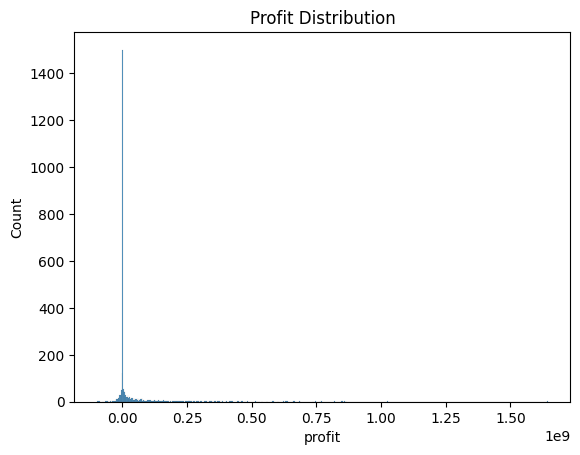

In [371]:
sns.histplot(data=movies_release, x="profit")
plt.title("Profit Distribution")
plt.show()

In [372]:
movies_release=movies_release[movies_release["profit"]>0]

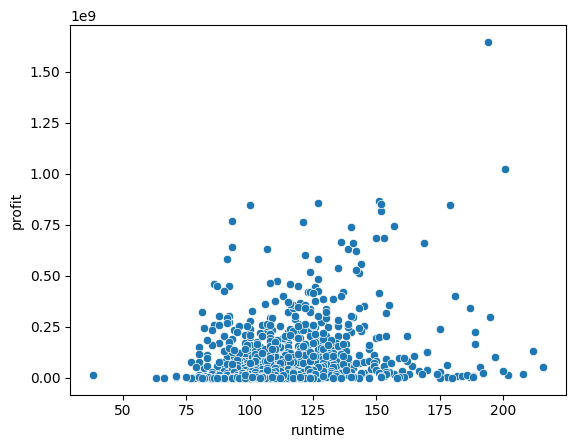

In [373]:
sns.scatterplot(data=movies_release,
                x="runtime",
                y="profit")
plt.show()

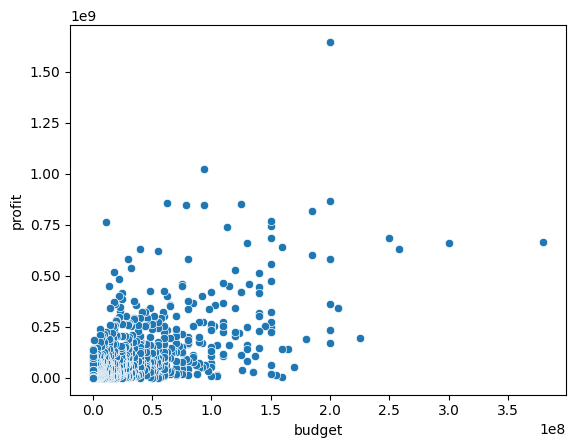

In [374]:
sns.scatterplot(data=movies_release,
                x="budget",
                y="profit")
plt.show()

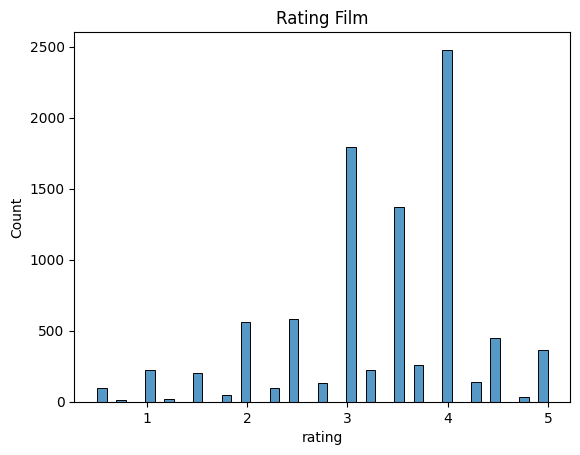

In [375]:
sns.histplot(data=rating_movies, x="rating")
plt.title("Rating Film")
plt.show()

In [376]:
rating_movies["good_movies"]=rating_movies["rating"]>3

In [377]:
movies_new=movies_release.merge(rating_movies,
                     left_on="id",
                     right_on="movieId",
                     how="inner")

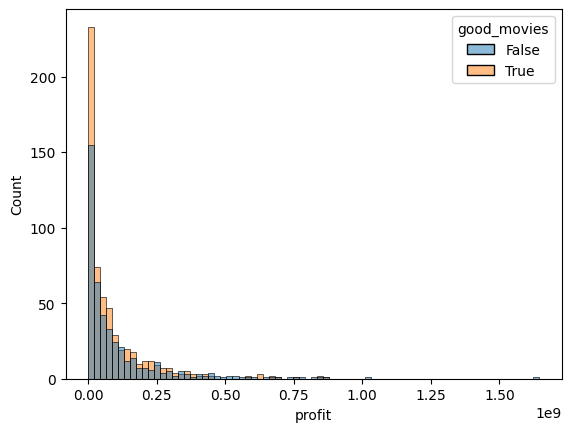

In [378]:
sns.histplot(data=movies_new,
             x="profit",
             hue="good_movies")
plt.show()

In [379]:
movies_new.select_dtypes(include="number")

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movieId_x,rating_x,profit,movies_hight_duration,movies_length_title,movies_years,movieId_y,rating_y
0,380000000,1865,27.887720,1.045714e+09,136.0,6.4,5068.0,1865,3.50,665713802.0,0,43,2011,1865,3.50
1,300000000,285,31.363664,9.610000e+08,169.0,6.9,4627.0,285,4.00,661000000.0,0,40,2007,285,4.00
2,258000000,559,27.614265,8.908716e+08,139.0,5.9,3687.0,559,5.00,632871626.0,0,12,2007,559,5.00
3,250000000,767,19.083723,9.339592e+08,153.0,7.4,5435.0,767,4.00,683959197.0,0,38,2009,767,4.00
4,225000000,2454,12.490891,4.196514e+08,150.0,6.3,1668.0,2454,3.75,194651413.0,0,40,2008,2454,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,0,103299,0.575656,3.206713e+06,105.0,7.3,4.0,103299,3.25,3206713.0,0,13,1992,103299,3.25
1027,0,62956,0.474556,4.635200e+04,104.0,6.5,2.0,62956,3.75,46352.0,0,15,2001,62956,3.75
1028,0,5302,0.138263,1.218730e+06,90.0,5.0,1.0,5302,3.50,1218730.0,0,23,1990,5302,3.50
1029,0,79163,0.003568,2.203000e+03,81.0,0.0,0.0,79163,4.00,2203.0,0,14,2006,79163,4.00


In [380]:
def select_columns(df: pd.DataFrame, features: list, target: list="rating_x"):
  X = df[features]
  y = (df[target]>3).astype("int")
  return X, y

In [381]:
from sklearn.model_selection import train_test_split

In [382]:
features=["budget", "popularity", "runtime", "vote_average"]
X, y = select_columns(movies_new, features=features)

In [383]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [384]:
from sklearn.preprocessing import MinMaxScaler

In [385]:
minmax=MinMaxScaler()

In [386]:
minmax.fit(X_train)

MinMaxScaler()

In [387]:
def scaling(df, scaler):
  scaled_array=scaler.transform(df)
  scaled_df=pd.DataFrame(df, columns=scaler.get_feature_names_out())
  return scaled_df

In [388]:
X_train_scaled=scaling(X_train, minmax)
X_test_scaled=scaling(X_test, minmax)

In [389]:
X_test_scaled

,budget,popularity,runtime,vote_average
31,150000000,4.351756,150.0,6.0
109,80000000,16.646029,91.0,6.5
136,70000000,13.842333,110.0,6.5
88,94000000,25.497794,100.0,7.6
920,0,7.137117,137.0,6.9
...,...,...,...,...
377,27000000,7.334686,112.0,6.2
615,8000000,11.040186,101.0,7.1
9,200000000,16.507496,115.0,5.9
357,30000000,6.045585,127.0,5.9


In [390]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [391]:
knn=KNeighborsClassifier(n_neighbors=3)
dt=DecisionTreeClassifier()

In [392]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [393]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [394]:
y_train_predict_knn=knn.predict(X_train_scaled)
y_train_predict_dt=dt.predict(X_train_scaled)

In [395]:
y_test_predict_knn=knn.predict(X_test_scaled)
y_test_predict_dt=dt.predict(X_test_scaled)

In [396]:
pd.crosstab(y_test, y_test_predict_knn)

col_0,0,1
rating_x,,
0,53,76
1,72,109


In [397]:
pd.crosstab(y_test, y_test_predict_dt)

col_0,0,1
rating_x,,
0,56,73
1,77,104


In [398]:
from sklearn.metrics import confusion_matrix, classification_report

In [399]:
print(confusion_matrix(y_test, y_test_predict_dt))

[[ 56  73]
 [ 77 104]]


In [400]:
print(classification_report(y_test, y_test_predict_dt))

              precision    recall  f1-score   support

           0       0.42      0.43      0.43       129
           1       0.59      0.57      0.58       181

    accuracy                           0.52       310
   macro avg       0.50      0.50      0.50       310
weighted avg       0.52      0.52      0.52       310



In [401]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

In [402]:
print("precision_score:", precision_score(y_test, y_test_predict_dt))
print("accuracy_score:", accuracy_score(y_test, y_test_predict_dt))
print("f1_score:", f1_score(y_test, y_test_predict_dt))
print("recall_score:", recall_score(y_test, y_test_predict_dt))

precision_score: 0.5875706214689266
accuracy_score: 0.5161290322580645
f1_score: 0.5810055865921788
recall_score: 0.574585635359116


In [403]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [404]:
knn_params = KNeighborsClassifier(n_neighbors=3, p=2)

In [405]:
knn_params.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [406]:
print(classification_report(y_test, knn_params.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.42      0.41      0.42       129
           1       0.59      0.60      0.60       181

    accuracy                           0.52       310
   macro avg       0.51      0.51      0.51       310
weighted avg       0.52      0.52      0.52       310



In [407]:
print(confusion_matrix(y_test, knn_params.predict(X_test_scaled)))

[[ 53  76]
 [ 72 109]]


In [408]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "p": [1, 2, 3, 4, 5]
}

In [409]:
from sklearn.model_selection import GridSearchCV

In [410]:
knn_new=GridSearchCV(KNeighborsClassifier(), knn_params, scoring=f1_score)

In [411]:
knn_new.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: f1_score() takes 2 positional arguments but 3 were given

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: f1_score() takes 2 positional arguments but 3 were given

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2, 3, 4, 5]},
             scoring=<function f1_score at 0x7c20bf7e4ca0>)

In [412]:
knn_new.best_params_

{'n_neighbors': 3, 'p': 1}

In [413]:
knn_best=knn_new.best_estimator_

In [414]:
knn_new.best_score_

nan

In [415]:
knn_best.predict(X_test_scaled)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [417]:
prob=knn_best.predict_proba(X_test_scaled)[:, 1]

In [419]:
(prob >= 0.5).astype("int")

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [421]:
recall_ = []
precision_ = []
accuracy_ = []
f1_score_ = []
for i in range (1, 11):
  y_best_knn_proba=knn_best.predict_proba(X_test_scaled)[:, 1]
  recall_.append(recall_score(y_test, y_best_knn_proba >= i/10))
  precision_.append(precision_score(y_test, y_best_knn_proba >= i/10))
  f1_score_.append(f1_score(y_test, y_best_knn_proba >= i/10))
  accuracy_.append(accuracy_score(y_test, y_best_knn_proba >= i/10))

In [427]:
metrics=pd.DataFrame({"recall"   : recall_,
              "precision": precision_,
              "accuracy" :accuracy_,
              "f1_score" : f1_score_})

In [428]:
metrics

,recall,precision,accuracy,f1_score
0,0.939227,0.582192,0.570968,0.718816
1,0.939227,0.582192,0.570968,0.718816
2,0.939227,0.582192,0.570968,0.718816
3,0.624309,0.594737,0.532258,0.609164
4,0.624309,0.594737,0.532258,0.609164
5,0.624309,0.594737,0.532258,0.609164
6,0.165746,0.576923,0.441935,0.257511
7,0.165746,0.576923,0.441935,0.257511
8,0.165746,0.576923,0.441935,0.257511
9,0.165746,0.576923,0.441935,0.257511


In [429]:
metrics["fpr"] =  1-metrics["recall"]

<Axes: xlabel='fpr'>

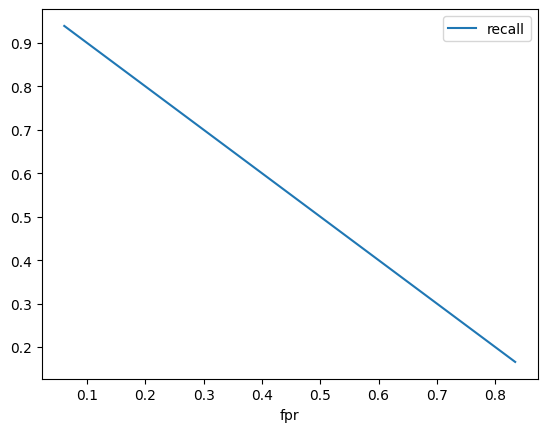

In [432]:
metrics.plot(x="fpr", y="recall")

In [433]:
from sklearn.metrics import roc_auc_score

In [434]:
roc_auc_score(y_test, knn_best.predict(X_test_scaled))

0.5137050837294959